In [1]:
from IPython.display import Image

In [ ]:
Lecture Material:

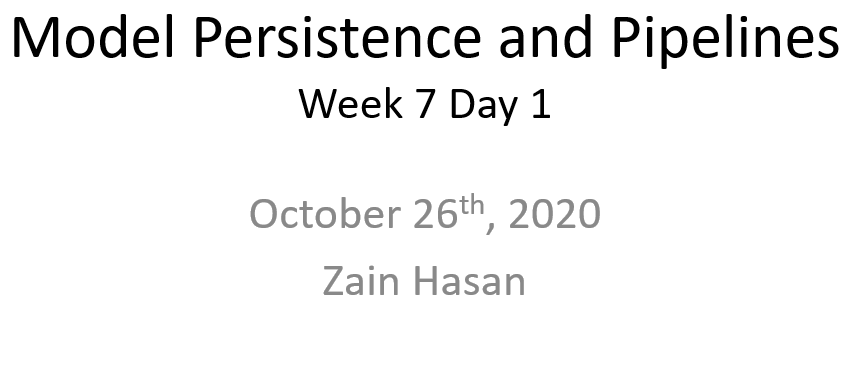

In [2]:
Image("2.PNG")

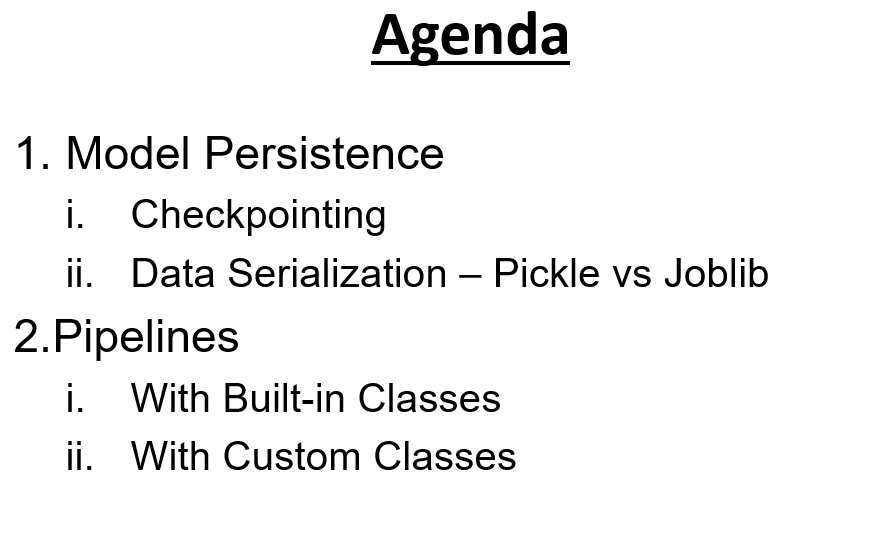

In [3]:
Image("1.PNG")

### What is Checkpointing:
* **Checkpointing** is a way to save a snapshot of your model's state (weights, hyperparameters etc.). 
* You can create checkpoints while the model is being trained or after training is complete.

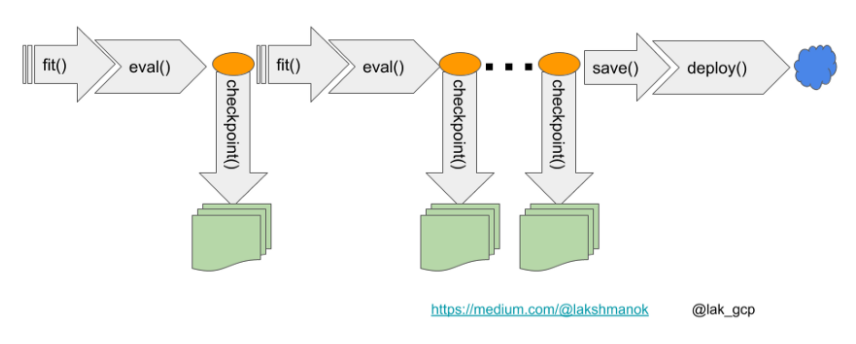

In [23]:
Image("checkpoint.PNG")
# https://towardsdatascience.com/ml-design-pattern-2-checkpoints-e6ca25a4c5fe

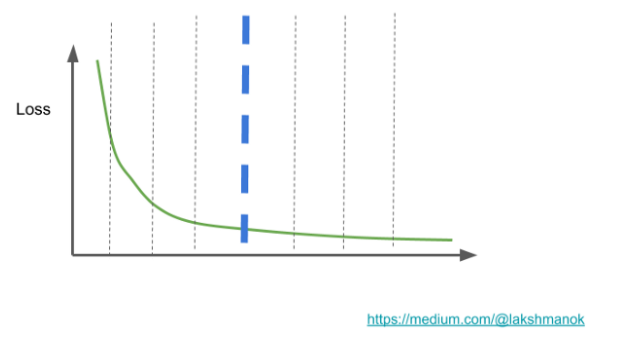

In [25]:
Image("checkpoint1.PNG")

#### It is useful because:

* **Resilience:** If your machine crashes during the training process you want to persist the model state so that you dont have to start training all over again

* **Explainability:** Checkpointing multiple times along the training process will allow you to undersstand how the model evolved as it was trained - This is widely used in order to the field of Explainability

* **Tuneability:** Saving model states at different points in the training process allows us to re-tune a model by re-starting training from a specific checkpoint 

* **Reproducability:** Models take time to train and we may train many models over different seed values and different data and we can save these to reproduce the same results

* **Deployment:** We need saved states of models trained to deploy models which can be used by a business or end user/customer to perform predictions/inference

* Think of midterm project you created. Now that you have trained and created a model you need a way to persist/save the weights and hyperparameters of the model in a format that the model, when loaded, is ready to predict right away

### We use Serialization to create Checkpoints

* Serialization is the process of converting an object into a stream of bytes to store the object or transmit it to memory, a database, or a file. Its main purpose is to save the state of an object in order to be able to recreate it when needed.


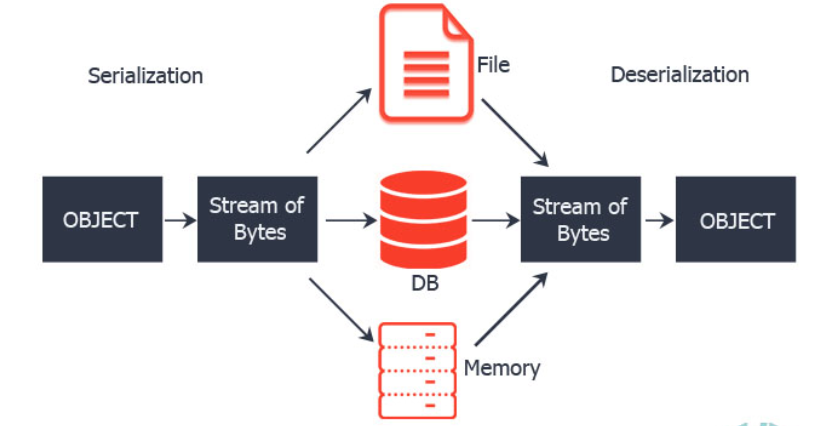

In [26]:
Image("serialization.PNG")

### Pickle

* Pickling is the process whereby a Python object hierarchy is converted into a byte stream (usually not human readable) 

* Unpickling is the reverse operation, whereby a byte stream is converted back into a working Python object hierarchy.

* Pickle is operationally simplest way to store the object. 

* The Python Pickle module is an object-oriented way to store objects directly in a special storage format.

[source: 'https://www.tutorialspoint.com/object_oriented_python/object_oriented_python_serialization.htm' ]

### What can it do?
* Pickle can store and reproduce dictionaries and lists very easily.
* Stores object attributes and restores them back to the same State.

### What pickle can’t do?
* It does not save an objects code. Only it’s attributes values.
* Pickle is version-dependent. For example, if you saved a model with a certain version of Sklearn then try to load it with a different one (e.g. you updated), there may be issues. (Another motivation for using virtual environments, which can be containerized.)
* In short we can say, pickling is a way to store and retrieve data variables into and out from files where variables can be lists, classes, etc.

### To Pickle something you must −

<code>import pickle
#To dump
f = open('directory/filename.pickle','wb')
pickle.dump(myobject, f)
#To load
f = open('directory/filename.pickle','rb')
file = pickle.load(f)</code>

#### Methods
The pickle interface provides four different methods.

dump() − The dump() method serializes to an open file (file-like object).

dumps() − Serializes to a string

load() − Deserializes from an open-like object.

loads() − Deserializes from a string.

[source: 'https://www.tutorialspoint.com/object_oriented_python/object_oriented_python_serialization.htm' ]

In [27]:
import pickle
#Here's an example dict
grades = { 'Alice': 89, 'Bob': 72, 'Charles': 87 }

#Use dumps to convert the object to a serialized string
serial_grades = pickle.dumps( grades )

#Use loads to de-serialize an object
received_grades = pickle.loads( serial_grades )

In [28]:
received_grades

{'Alice': 89, 'Bob': 72, 'Charles': 87}

In [29]:
serial_grades  #Machine code

b'\x80\x03}q\x00(X\x05\x00\x00\x00Aliceq\x01KYX\x03\x00\x00\x00Bobq\x02KHX\x07\x00\x00\x00Charlesq\x03KWu.'

### Joblib - a replacement for pickle to work efficiently on Python objects containing large data


<code>import pickle
#To dump
f = 'directory/filename.joblib'
joblib.dump(file_to_dump, f)
    
#To load
file = joblib.load(f)

#To compress and dump
f = 'directory/filename.joblib'
joblib.dump(file_to_dump, f + '.bz2', compress=('bz2', 3))
</code>

#### The supported compression methods are ‘compressed’(auto), ‘z’, ‘gzip’, ‘bz2’, ‘lzma’ and ‘xz’.

In [9]:
from sklearn.svm import SVC
from sklearn import datasets
clf = SVC()
X, y= datasets.load_iris(return_X_y=True)
clf.fit(X, y)
SVC()

C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
import pickle
import numpy as np
s = pickle.dumps(clf)

In [11]:
s

b'\x80\x03csklearn.svm.classes\nSVC\nq\x00)\x81q\x01}q\x02(X\x17\x00\x00\x00decision_function_shapeq\x03X\x03\x00\x00\x00ovrq\x04X\x06\x00\x00\x00kernelq\x05X\x03\x00\x00\x00rbfq\x06X\x06\x00\x00\x00degreeq\x07K\x03X\x05\x00\x00\x00gammaq\x08X\x0f\x00\x00\x00auto_deprecatedq\tX\x05\x00\x00\x00coef0q\nG\x00\x00\x00\x00\x00\x00\x00\x00X\x03\x00\x00\x00tolq\x0bG?PbM\xd2\xf1\xa9\xfcX\x01\x00\x00\x00Cq\x0cG?\xf0\x00\x00\x00\x00\x00\x00X\x02\x00\x00\x00nuq\rG\x00\x00\x00\x00\x00\x00\x00\x00X\x07\x00\x00\x00epsilonq\x0eG\x00\x00\x00\x00\x00\x00\x00\x00X\t\x00\x00\x00shrinkingq\x0f\x88X\x0b\x00\x00\x00probabilityq\x10\x89X\n\x00\x00\x00cache_sizeq\x11K\xc8X\x0c\x00\x00\x00class_weightq\x12NX\x07\x00\x00\x00verboseq\x13\x89X\x08\x00\x00\x00max_iterq\x14J\xff\xff\xff\xffX\x0c\x00\x00\x00random_stateq\x15NX\x07\x00\x00\x00_sparseq\x16\x89X\r\x00\x00\x00class_weight_q\x17cnumpy.core.multiarray\n_reconstruct\nq\x18cnumpy\nndarray\nq\x19K\x00\x85q\x1aC\x01bq\x1b\x87q\x1cRq\x1d(K\x01K\x03\x85q\x1ecnu

In [12]:
clf2 = pickle.loads(s)

In [13]:
clf2.support_vectors_

array([[4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [6.9, 3.1, 4.9, 1.5],
       [6.5, 2.8, 4.6, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [5. , 2. , 3.5, 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [6.2, 2.2, 4.5, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 2.5, 4.9, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.1, 2.5, 3. , 1.1],
       [6.3, 3.3, 6. , 2.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.5, 3.2, 5.1, 2. ],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3

In [14]:
y[0]

0

In [15]:
X[0:1]

array([[5.1, 3.5, 1.4, 0.2]])

In [16]:
clf2.predict(X[0:1])
# np.array([0])
# y[0]

array([0])

### Use of joblib over pickle

* joblib is usually **significantly faster on large numpy arrays** because it has a special handling for the array buffers of the numpy datastructure. To find about the implementation details you can have a look at the source code.

* if you don't serialize large numpy arrays, then pickle can be significantly faster, especially on large collections of small python objects (e.g. a large dict of str objects) because the pickle module is implemented in C while joblib is pure python.

* joblib can also compress data on the fly while pickle cannot - the pickled file needs to be compressed seperately.

* *Note: Starting with Python 3.8, Pickle is actually better than Joblib for saving `numpy` arrays. If you have Python >=3.8, just use Pickle. [Source](https://stackoverflow.com/a/12617603).


In [ ]:
#!pip install joblib
import joblib

In [18]:
joblib.dump(clf2, 'clf2.can')

['clf2.can']

In [19]:
clf2 = load('clf2.can') 

In [20]:
clf2.support_vectors_

array([[4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [6.9, 3.1, 4.9, 1.5],
       [6.5, 2.8, 4.6, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [5. , 2. , 3.5, 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [6.2, 2.2, 4.5, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 2.5, 4.9, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.1, 2.5, 3. , 1.1],
       [6.3, 3.3, 6. , 2.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.5, 3.2, 5.1, 2. ],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3

### Saving Model Parameters Only

Oftentimes, we don't want to save the entire Python class. What we really might want to save could just be the model parameters. This can have some advantages:

* Faster to save, smaller data size, and simpler storage format, since parameters are usually just numpy arrays.
* No version issues, since you are just saving numbers. If the Sklearn developers change something about the model class, you will still be able to safely load the parameters you saved.
* Framework-independent (i.e. don't have to load back in Sklearn, or even Python).

#### Of course, there are also some disadvantages:

* More convoluted process programmatically
* Models might have many different parameter attributes
* Models might have complex architectures that link their parameters
* You cannot save an entire workflow (e.g. Sklearn pipeline)
* When loading, you have to recreate the model and define it the same way as when you trained it, before restoring the parameters

In [30]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier(alpha=0.1)
_ = model.fit(X, y)

In [33]:
import numpy as np

# Save the model's parameters
np.save('logistic_coef.npy', model.coef_)
np.save('logistic_intercept.npy', model.intercept_)

# Recreate the model with the same arguments as when you trained it
loaded_model = RidgeClassifier(alpha=0.1)

# Load the model's parameters
loaded_model.coef_ = np.load('logistic_coef.npy')
loaded_model.intercept_ = np.load('logistic_intercept.npy')
    
assert (model.coef_ == loaded_model.coef_).all()
assert (model.intercept_ == loaded_model.intercept_).all()

## Pipelines

1. A pipeline defines all the steps such as transformation, modelling and hyperparameter tuning into one variable or object
2. You can at once perform parameter tuning,scaling and modelling using the same object

## Demo 1 - Without Pipelines:

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

df.head()

X = df.drop(columns='class')
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

pca = PCA(n_components=3)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

model = LogisticRegression()
model.fit(X_train_pca, y_train)

X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

y_pred = model.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')

Test set accuracy: 0.6948051948051948


C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


## With Sklearn Pipelines:

In [7]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[('scaling', StandardScaler()),
                           ('pca', PCA(n_components=3)),
                           ('classifier', LogisticRegression())])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')

Test set accuracy: 0.6948051948051948


C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


#### Notice how much cleaner this code is. The composite model created using Pipeline can be used just like any other Sklearn model you have learned, which means that it can also be passed to functions like cross_val_score().

### Hyperparameter tuning with pipelines - Demo2

Normally, if we want to tune hyperparameters using something like GridSearchCV, we need to pass it:

* A model object.
* A dictionary of (parameter name, list of values to try) pairs.

When not using pipelines, we can only tune hyperparameters for a single model (the one we specify as the model in GridSearchCV. As we've seen, however, we can create composite models using Pipeline. We can then pass this composite model to GridSearchCV and tune hyperparameters for multiple components at once.

[source: 'https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976' ]

In [37]:
import pandas as pd 
winedf = pd.read_csv('./winequality-red.csv')
# print winedf.isnull().sum() # check for missing data
winedf.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [38]:
X=winedf.drop(['quality'],axis=1)
Y=winedf['quality']

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [45]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps) # define the pipeline object.

In [46]:
pipeline

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=30, stratify=Y)

In [49]:
print(winedf['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [52]:
parameters = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [ ]:
grid.fit(X_train, y_train)
#print("score = %3.2f" %(grid.score(X_test,y_test)))
#print(grid.best_params_)

### Sklearn Pipeline Demo 3 - Using Feature Unions

Pipeline lets us specify a sequence of steps that will be executed in one after the other (i.e. in series), but want if we want branches in our process? For instance, what if we want to create two different sets of features and use both of them when fitting our model?

For this type of application, we can use a FeatureUnion. It is an Sklearn class that lets us join the outputs of several steps through concatenation (i.e. in parallel). FeatureUnion's can be composed with Pipeline's however much we want.


[source: 'https://machinelearningmastery.com/automate-machine-learning-workflows-pipelines-python-scikit-learn/' ]

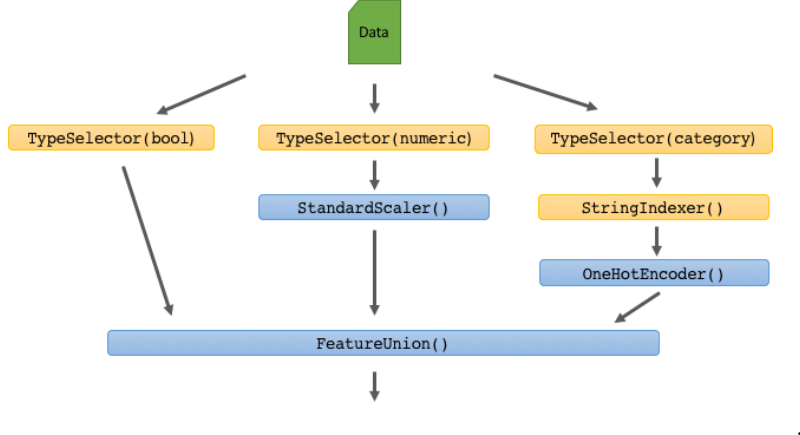

In [23]:
Image('featureunion.PNG')

### Use pima indians dataset to:
1. Create 3 PCA components

2. Select 6 KBest features using k-best feature selection

3. Combine 6 best features selected with 3 PCA components to create new X - feature union

4. Use Logistic Regression to classify diabetics with non diabetics

5. Perform KFold CrossValidation

6. Print cross validation score

In [10]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

In [11]:
feature_union

FeatureUnion(n_jobs=None,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('select_best', SelectKBest(k=6, score_func=<function f_classif at 0x00000253281B5950>))],
       transformer_weights=None)

In [12]:
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))

In [13]:
estimators

[('feature_union', FeatureUnion(n_jobs=None,
         transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('select_best', SelectKBest(k=6, score_func=<function f_classif at 0x00000253281B5950>))],
         transformer_weights=None)),
 ('logistic',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False))]

In [14]:
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7760423786739576


C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

### Use custom class in sklearn pipeline

[source: 'https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156' ]

In [15]:
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression

In [16]:
df = pd.DataFrame(columns=['X1', 'X2', 'y'], data=[
                                                   [1,16,9],
                                                   [4,36,16],
                                                   [1,16,9],
                                                   [2,9,8],
                                                   [3,36,15],
                                                   [2,49,16],
                                                   [4,25,14],
                                                   [5,36,17]
])

### y = X1 + 2 * sqrt(X2)

train = df.iloc[:6]
test = df.iloc[6:]

train_X = train.drop('y', axis=1)
train_y = train.y

test_X = test.drop('y', axis=1)
test_y = test.y


In [17]:
m1 = LinearRegression()
fit1 = m1.fit(train_X, train_y)
preds = fit1.predict(test_X)
print(f"\n{preds}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds))}\n")


[13.72113586 16.93334467]
RMSE: 0.20274138822160725



* Predictions above are off
* Let us try to transform X and fit a model again

In [18]:
class ExperimentalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('\n>>>>>>>init() called.\n')

    def fit(self, X, y = None):
        print('\n>>>>>>>fit() called.\n')
        return self

    def transform(self, X, y = None):
        print('\n>>>>>>>transform() called.\n')
        X_ = X.copy() # creating a copy to avoid changes to original dataset
        X_.X2 = 2 * np.sqrt(X_.X2)
        return X_

In [19]:
# without input transformation - to validate that we get the same results as before
print("create pipeline 1")
pipe1 = Pipeline(steps=[
                       ('linear_model', LinearRegression())
])
print("fit pipeline 1")
pipe1.fit(train_X, train_y)

print("predict via pipeline 1")
preds1 = pipe1.predict(test_X)

print(f"\n{preds1}")  # should be [13.72113586 16.93334467]
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds1))}\n")

create pipeline 1
fit pipeline 1
predict via pipeline 1

[13.72113586 16.93334467]
RMSE: 0.20274138822160725



In [20]:
# with input transformation
print("create pipeline 2")
pipe2 = Pipeline(steps=[
                       ('experimental_trans', ExperimentalTransformer()),    # this will trigger a call to __init__
                       ('linear_model', LinearRegression())
])

# an alternate, shorter syntax to do the above, without naming each step, is:
#pipe2 = make_pipeline(ExperimentalTransformer(), LinearRegression())

print("fit pipeline 2")
pipe2.fit(train_X, train_y)
print("predict via pipeline 2")
preds2 = pipe2.predict(test_X)
print(f"\n{preds2}")  # should be [14. 17.]
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds2))}\n")

create pipeline 2

>>>>>>>init() called.

fit pipeline 2

>>>>>>>fit() called.


>>>>>>>transform() called.

predict via pipeline 2

>>>>>>>transform() called.


[14. 17.]
RMSE: 5.17892563931115e-15

